# Data analysis

In [1]:
import os
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 设置数据集路径
dataset_path = "RAVDESS Emotional speech audio"

# 获取所有音频文件
files = []#[f for f in os.listdir(dataset_path) if f.endswith(".wav")]
for root, dirs, filenames in os.walk(dataset_path):
    for filename in filenames:
        if filename.endswith(".wav"):
            files.append(os.path.join(root, filename))  # 保存完整路径

# 解析文件名，提取信息
data = []
for file in files:
    parts = file.split("-")
    # print(parts)
    emotion = int(parts[2])  # 提取情感类别
    intensity = int(parts[3])  # 提取强度（01-正常, 02-高强度）
    gender = "Male" if int(parts[6].split('.')[0]) % 2 == 1 else "Female"  # 根据说话者 ID 判断性别
    data.append([file, emotion, intensity, gender])


In [3]:
LABELS = {
    "01": "neutral",
    "02": "neutral",  # Merge "calm" into "neutral"
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
    "07": "disgust",
    "08": "surprise"
}

In [4]:

# 转换为 DataFrame
df = pd.DataFrame(data, columns=["Filename", "Emotion", "Intensity", "Gender"])

# 统计数据分布
print(df["Emotion"].value_counts())  # 统计每种情感的数量
print(df["Gender"].value_counts())   # 统计性别分布
print('1')

Emotion
2    192
3    192
4    192
5    192
6    192
7    192
8    192
1     96
Name: count, dtype: int64
Gender
Male      720
Female    720
Name: count, dtype: int64
1


In [5]:
df["Emotion"] = df["Emotion"].astype(str).str.zfill(2)  # Ensure two-digit format
df["Emotion"] = df["Emotion"].map(LABELS)  # Apply mapping

In [6]:
print(df.head())

                                            Filename  Emotion  Intensity  \
0  RAVDESS Emotional speech audio\Actor_01\03-01-...  neutral          1   
1  RAVDESS Emotional speech audio\Actor_01\03-01-...  neutral          1   
2  RAVDESS Emotional speech audio\Actor_01\03-01-...  neutral          1   
3  RAVDESS Emotional speech audio\Actor_01\03-01-...  neutral          1   
4  RAVDESS Emotional speech audio\Actor_01\03-01-...  neutral          1   

  Gender  
0   Male  
1   Male  
2   Male  
3   Male  
4   Male  


In [7]:
df

,Filename,Emotion,Intensity,Gender
0,RAVDESS Emotional speech audio\Actor_01\03-01-...,neutral,1,Male
1,RAVDESS Emotional speech audio\Actor_01\03-01-...,neutral,1,Male
2,RAVDESS Emotional speech audio\Actor_01\03-01-...,neutral,1,Male
3,RAVDESS Emotional speech audio\Actor_01\03-01-...,neutral,1,Male
4,RAVDESS Emotional speech audio\Actor_01\03-01-...,neutral,1,Male
...,...,...,...,...
1435,RAVDESS Emotional speech audio\Actor_24\03-01-...,surprise,1,Female
1436,RAVDESS Emotional speech audio\Actor_24\03-01-...,surprise,2,Female
1437,RAVDESS Emotional speech audio\Actor_24\03-01-...,surprise,2,Female
1438,RAVDESS Emotional speech audio\Actor_24\03-01-...,surprise,2,Female


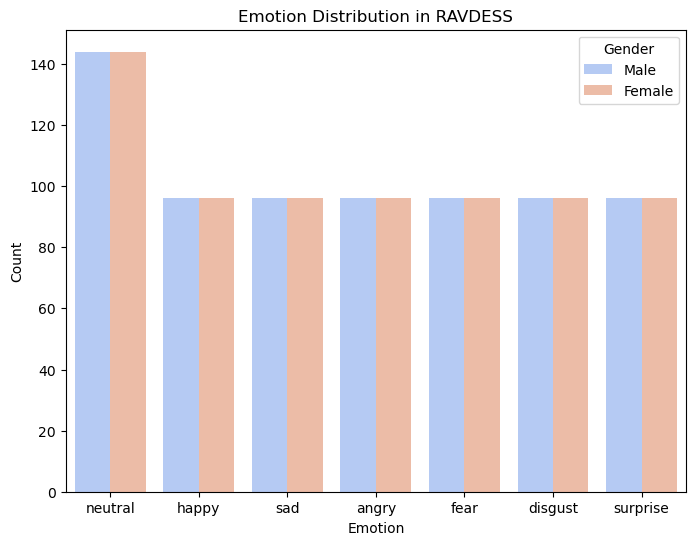

In [8]:


plt.figure(figsize=(8, 6))
sns.countplot(x="Emotion", hue="Gender", data=df, palette="coolwarm")
plt.title("Emotion Distribution in RAVDESS")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

# Speech feature extraction

In [8]:
def extract_mfcc(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc = np.mean(mfcc, axis=1)  # 对每帧特征取均值
    return mfcc

In [9]:
import librosa.display
import matplotlib.pyplot as plt

# 提取Mel Spectrogram
def extract_melspectrogram(file_path, sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return np.mean(mel_spec_db, axis=1)

# 提取其他音频特征
def extract_zero_crossing_rate(file_path, sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    return np.mean(zcr, axis=1)

In [10]:
mfcc_features = []

# 处理所有音频文件并提取 MFCC 特征
mfcc_features = []
for file in files:
    mfcc = extract_mfcc(file)  # file 已经是完整的路径
    mel_spec = extract_melspectrogram(file)
    zcr = extract_zero_crossing_rate(file)
    
    feature_vector = np.concatenate((mfcc, mel_spec, zcr))
    mfcc_features.append(feature_vector)

# 转换为 DataFrame
mfcc_df = pd.DataFrame(mfcc_features)

# 假设情感标签与音频文件的顺序一致，或者你需要通过文件名或其他方式映射标签
mfcc_df["Emotion"] = df["Emotion"]  # 你可以根据实际的标签存储方式调整

# 打印提取的特征
print(mfcc_df.head())  # 查看前几行特征
print('111')

            0          1         2          3         4          5         6  \
0 -726.217224  68.541420  3.293398  12.205300  5.510278  13.667408 -2.983829   
1 -719.128296  70.201569  1.168397  13.122543  7.836950  14.411290 -4.111360   
2 -714.995728  69.689346  3.924564  11.924190  6.421723  11.011614 -2.878103   
3 -710.975281  67.564880  5.782241  13.230727  6.190846  12.628252 -1.675170   
4 -759.921753  75.783524  6.023605  14.557394  6.454188  14.631508 -3.004551   

          7         8         9  ...        133        134        135  \
0  3.098029 -3.310813 -1.564384  ... -70.021904 -70.534943 -70.842972   
1  4.468973 -3.539367 -3.658607  ... -70.528221 -70.722054 -71.297203   
2  4.509558 -4.476109 -2.671550  ... -71.734444 -72.157852 -72.784225   
3  5.657494 -4.950634 -3.477545  ... -72.009544 -72.612411 -72.917633   
4  4.620970 -5.200016 -0.707430  ... -71.322784 -71.591965 -71.400848   

         136        137        138        139        140       141  Emotion  
0 

## 0.6203703703703703 version

In [36]:

# ✅ 标准化之后划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ✅ 在训练集上 fit PCA，然后 transform 测试集
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)


In [37]:

# ✅ 定义最终的 SVM 模型
from sklearn.svm import SVC

best_params = {'C': 100, 'kernel': 'rbf'}
model = SVC(**best_params, probability=True)


In [38]:

# ✅ 定义并训练最终模型
from sklearn.svm import SVC

best_params = {'C': 100, 'kernel': 'rbf'}
model = SVC(**best_params, probability=True)
model.fit(X_pca_train, y_train)

# ✅ 使用训练集评估准确率（注意特征必须匹配）
y_train_pred = model.predict(X_pca_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")


Train Accuracy: 1.0


In [40]:

# ✅ 保存 SVM 模型、Scaler 和 PCA
import joblib

joblib.dump(model, 'models/svm_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(pca, 'models/pca.pkl')
print("✅ 模型、Scaler 和 PCA 已成功保存")


✅ 模型、Scaler 和 PCA 已成功保存
